In [7]:
import os
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import tensorflow_hub as hub
import tensorflowjs as tfjs
from tensorflow.keras import models, layers
from keras_preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import itertools

In [8]:
path = 'C:/Users/Raniah/Downloads/Bangkit/Capstone/model/'
TRAIN = os.path.join(path, 'training')
VALIDATION = os.path.join(path, 'validation')
TESTING = os.path.join(path, 'testing')

In [9]:
train_datagen = ImageDataGenerator(
        rescale = 1./255.
    )

train_generator = train_datagen.flow_from_directory(
        TRAIN,
        batch_size = 25,
        class_mode = 'binary',
        target_size = (256, 256),
        color_mode = 'rgb',
        shuffle = True,
        classes = ['bacterial', 'healthy']
    )

Found 7175 images belonging to 2 classes.


In [10]:
validation_datagen = ImageDataGenerator(
        rescale = 1./255.
    )

validation_generator = validation_datagen.flow_from_directory(
        VALIDATION,
        batch_size = 25,
        class_mode = 'binary',
        target_size = (256, 256),
        color_mode = 'rgb',
        shuffle = 1000,
        classes = ['bacterial', 'healthy']
    )

Found 2558 images belonging to 2 classes.


In [11]:
# Initialize the ImageDataGenerator object for preprocessing
testing_datagen = ImageDataGenerator(
    rescale=1./255.
)

# Use testing_datagen to create the testing generator
testing_generator = testing_datagen.flow_from_directory(
    TESTING,
    batch_size=25,
    class_mode='binary',
    target_size=(256, 256),
    color_mode='rgb',
    shuffle=True,
    classes=['bacterial', 'healthy']
)

Found 74 images belonging to 2 classes.


In [12]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation = 'relu', input_shape=(256, 256, 3)),
    tf.keras.layers.MaxPooling2D((2,2)),
    tf.keras.layers.Conv2D(64, (3, 3), activation = 'relu'),
    tf.keras.layers.MaxPooling2D((2,2)),
    tf.keras.layers.Conv2D(64, (3, 3), activation = 'relu'),
    tf.keras.layers.MaxPooling2D((2,2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64, activation = 'relu'),
    tf.keras.layers.Dense(1, activation = 'sigmoid')
])

model.compile(
    optimizer = tf.keras.optimizers.Adam(),
    loss = tf.keras.losses.BinaryCrossentropy(),
    metrics = ['accuracy']
)

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 254, 254, 32)      896       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 127, 127, 32)     0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 62, 62, 64)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 60, 60, 64)        36928     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 30, 30, 64)      

In [13]:
#train the network with the given inputs and the corresponding Labels
history = model.fit(
    train_generator, validation_data = validation_generator,
    epochs=10,
    batch_size=25,
    verbose=1,
)

Epoch 1/10
287/287 [==============================] - 1153s 4s/step - loss: 0.2904 - accuracy: 0.8829 - val_loss: 0.1148 - val_accuracy: 0.9652
Epoch 2/10
287/287 [==============================] - 1292s 4s/step - loss: 0.0986 - accuracy: 0.9642 - val_loss: 0.0451 - val_accuracy: 0.9879
Epoch 3/10
287/287 [==============================] - 1308s 5s/step - loss: 0.0484 - accuracy: 0.9840 - val_loss: 0.0755 - val_accuracy: 0.9769
Epoch 4/10
287/287 [==============================] - 896s 3s/step - loss: 0.0258 - accuracy: 0.9908 - val_loss: 0.0271 - val_accuracy: 0.9910
Epoch 5/10
287/287 [==============================] - 882s 3s/step - loss: 0.0275 - accuracy: 0.9908 - val_loss: 0.0119 - val_accuracy: 0.9973
Epoch 6/10
287/287 [==============================] - 883s 3s/step - loss: 0.0131 - accuracy: 0.9954 - val_loss: 0.0119 - val_accuracy: 0.9957
Epoch 7/10
287/287 [==============================] - 863s 3s/step - loss: 0.0197 - accuracy: 0.9940 - val_loss: 0.0110 - val_accuracy: 0.9

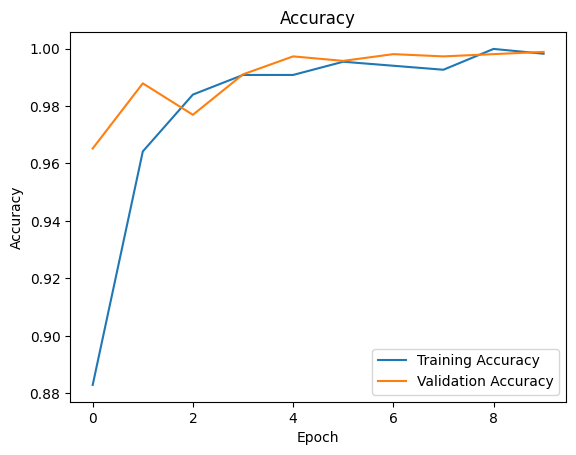

In [14]:
acc=history.history['accuracy']
val_acc=history.history['val_accuracy']
loss=history.history['loss']
val_loss=history.history['val_loss']

epochs=range(len(acc)) 

plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.title('Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [15]:
test_loss, test_acc = model.evaluate(testing_generator)
print('Test Loss :', test_loss)
print('Test Accuracy : ', test_acc)

3/3 [==============================] - 3s 625ms/step - loss: 2.6678e-05 - accuracy: 1.0000
Test Loss : 2.667838998604566e-05
Test Accuracy :  1.0


In [16]:
history
print(history.params)
print(history.history.keys())
len(history.history['accuracy'])

{'verbose': 1, 'epochs': 10, 'steps': 287}
dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


10

In [17]:
acc=history.history['accuracy']
val_acc=history.history['val_accuracy']

loss=history.history['loss']
val_loss=history.history['val_loss']

Text(0.5, 1.0, 'Training and Validation loss')

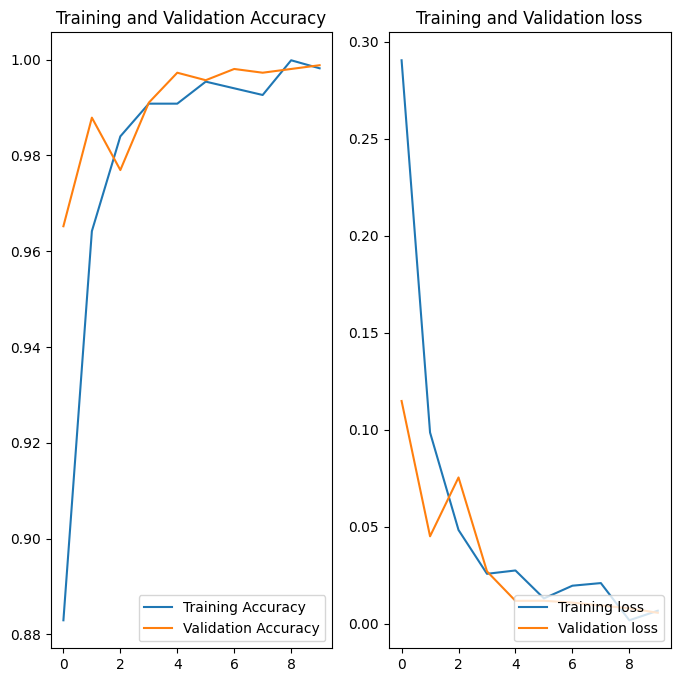

In [18]:
plt.figure(figsize=(8,8))
plt.subplot(1,2,1)
plt.plot(range(10), acc,label='Training Accuracy')
plt.plot(range(10), val_acc,label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1,2,2)
plt.plot(range(10), loss,label='Training loss')
plt.plot(range(10), val_loss,label='Validation loss')
plt.legend(loc='lower right')
plt.title('Training and Validation loss')

3/3 [==============================] - 5s 823ms/step


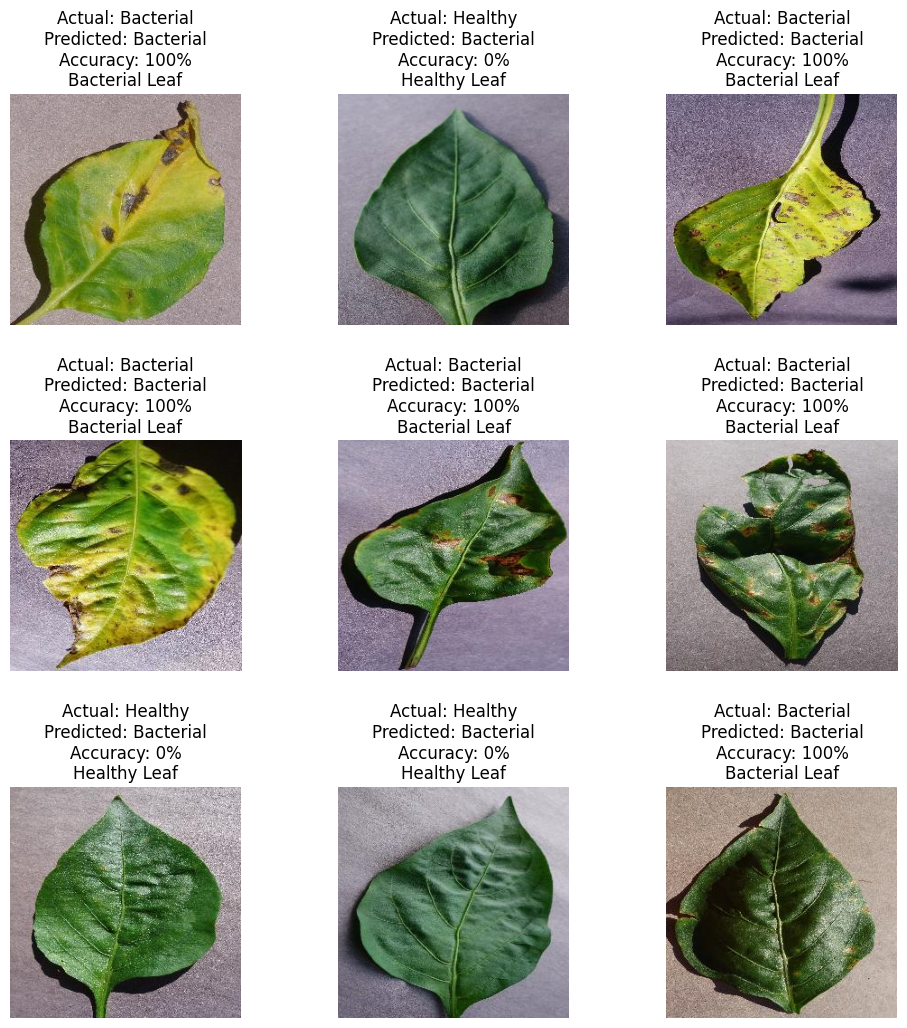

In [28]:
# Predict using the model on the testing generator
predictions = model.predict(testing_generator)

# Take some sample images from the testing generator
num_images = 9
images, labels = testing_generator.next()
predicted_labels = np.argmax(predictions[:num_images], axis=1)

# Configure the plot
plt.figure(figsize=(12, 12))
plt.subplots_adjust(hspace=0.5)

# Iterate through the images and their labels
for i in range(num_images):
    ax = plt.subplot(3, 3, i+1)
    plt.imshow(images[i])

    # Get the actual label by converting the one-hot encoded labels to their original form
    actual_label = 'Healthy' if labels[i] == 1 else 'Bacterial'
    
    # Get the predicted label by mapping the predicted label index to the respective class
    predicted_label = 'Healthy' if predicted_labels[i] == 1 else 'Bacterial'
    
    # Calculate the accuracy for the current image
    accuracy = 100 if predicted_labels[i] == labels[i] else 0
    
    # Determine the title based on accuracy
    if accuracy == 0:
        title = 'Healthy Leaf'
    else:
        title = 'Bacterial Leaf'

    # Add accuracy to the image title
    plt.title('Actual: {}\nPredicted: {}\nAccuracy: {}%\n{}'.format(actual_label, predicted_label, accuracy, title))
    plt.axis('off')
    
plt.show()

In [29]:
saved_model_path = "C:/Users/Raniah/Downloads/Bangkit/Capstone/Code/ujicoba/tfjs/{model}"
tf.saved_model.save(model, saved_model_path)

INFO:tensorflow:Assets written to: C:/Users/Raniah/Downloads/Bangkit/Capstone/Code/ujicoba/tfjs/{model}\assets


INFO:tensorflow:Assets written to: C:/Users/Raniah/Downloads/Bangkit/Capstone/Code/ujicoba/tfjs/{model}\assets


TFJS

In [30]:
tfjs.converters.save_keras_model(model, 'C:/Users/Raniah/Downloads/Bangkit/Capstone/Code')